In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd 
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
import os 
os.chdir('F:/BigContest_NOVUS/NOVUS_Futures/Preprocessing/preprocessing data/data')

In [3]:
pit_HH = pd.read_csv('./pit/pit_HH.csv')
pit_HH = pit_HH.drop([pit_HH.columns[1]],axis=1)
pit_HH.head()

,Unnamed: 0,GDAY_DS,T_ID,ER,WLS
0,0,2020-05-05,HH,0.00,1.00
1,1,2020-05-06,HH,0.62,0.75
2,2,2020-05-07,HH,1.03,0.72
3,3,2020-05-08,HH,1.33,0.67
4,4,2020-05-09,HH,1.57,0.61


<IPython.core.display.Javascript object>


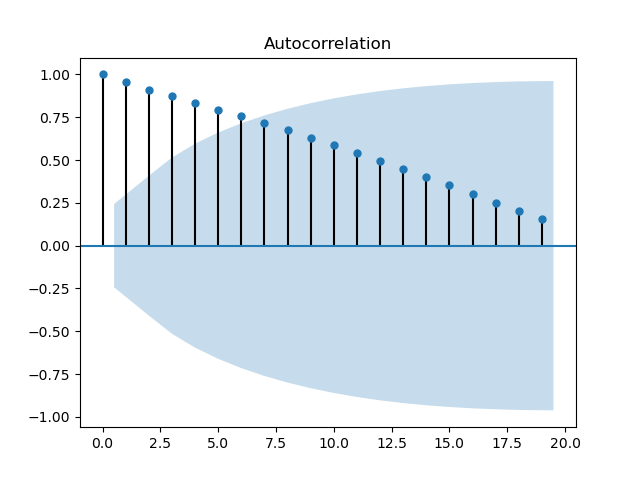

<IPython.core.display.Javascript object>


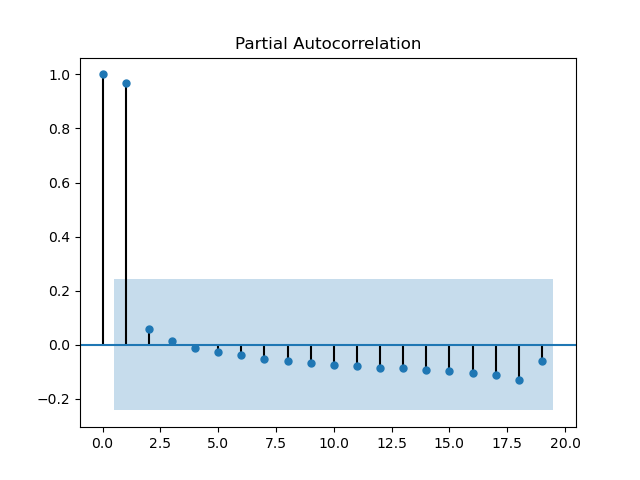

<IPython.core.display.Javascript object>


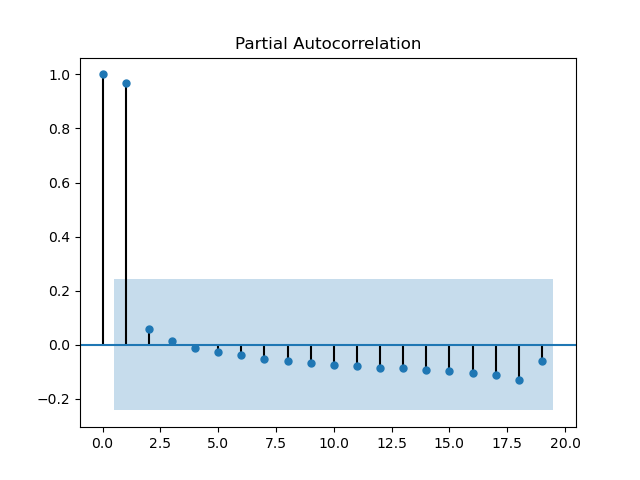

In [4]:
HH_er = pit_HH.iloc[:,[3]]
plot_acf(HH_er)
plot_pacf(HH_er)

In [19]:
pit_HT = pd.read_csv('./pit/pit_HT.csv')
pit_HT = pit_HT.drop([pit_HT.columns[1]],axis=1)
pit_HT.head()

,Unnamed: 0,GDAY_DS,T_ID,ER,WLS
0,0,2020-05-05,HT,11,0.00
1,1,2020-05-06,HT,2,0.00
2,2,2020-05-07,HT,5,0.33
3,3,2020-05-08,HT,4,0.25
4,4,2020-05-09,HT,13,0.20


<IPython.core.display.Javascript object>


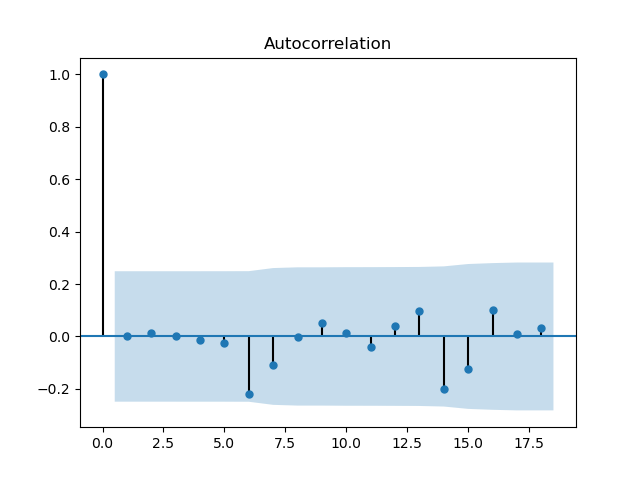

<IPython.core.display.Javascript object>


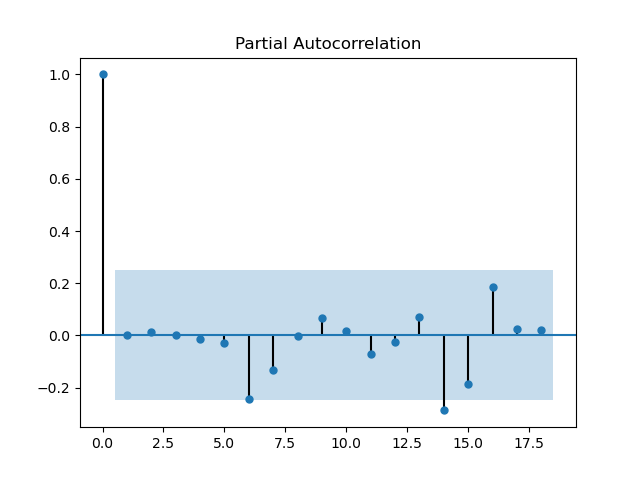

<IPython.core.display.Javascript object>


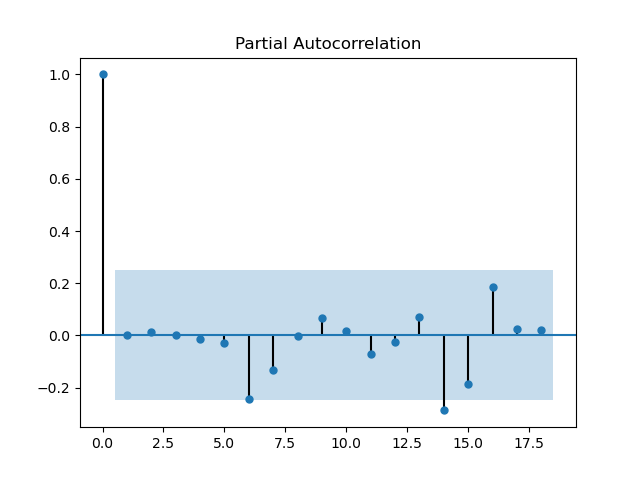

In [51]:
HT_er = pit_HT.iloc[:,[3]]
plot_acf(HT_er)
plot_pacf(HT_er)

In [17]:
# 리팩토링 필요
pit_KT = pd.read_csv('./pit/pit_KT.csv')
pit_KT = pit_KT.drop([pit_KT.columns[1]],axis=1)
pit_LG = pd.read_csv('./pit/pit_LG.csv')
pit_LG = pit_LG.drop([pit_LG.columns[1]],axis=1)
pit_LT = pd.read_csv('./pit/pit_LT.csv')
pit_LT = pit_LT.drop([pit_LT.columns[1]],axis=1)
pit_NC = pd.read_csv('./pit/pit_NC.csv')
pit_NC = pit_NC.drop([pit_NC.columns[1]],axis=1)
pit_OB = pd.read_csv('./pit/pit_OB.csv')
pit_OB = pit_OB.drop([pit_OB.columns[1]],axis=1)
pit_SK = pd.read_csv('./pit/pit_SK.csv')
pit_SK = pit_SK.drop([pit_SK.columns[1]],axis=1)
pit_SS = pd.read_csv('./pit/pit_SS.csv')
pit_SS = pit_SS.drop([pit_SS.columns[1]],axis=1)
pit_WO = pd.read_csv('./pit/pit_WO.csv')
pit_WO = pit_WO.drop([pit_WO.columns[1]],axis=1)

<IPython.core.display.Javascript object>


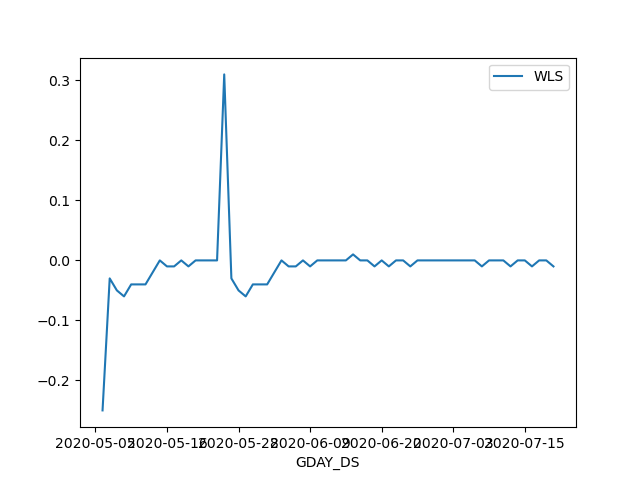

<IPython.core.display.Javascript object>


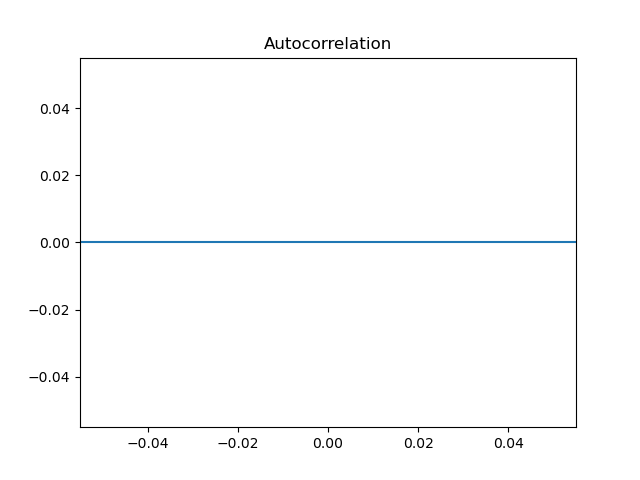

<IPython.core.display.Javascript object>


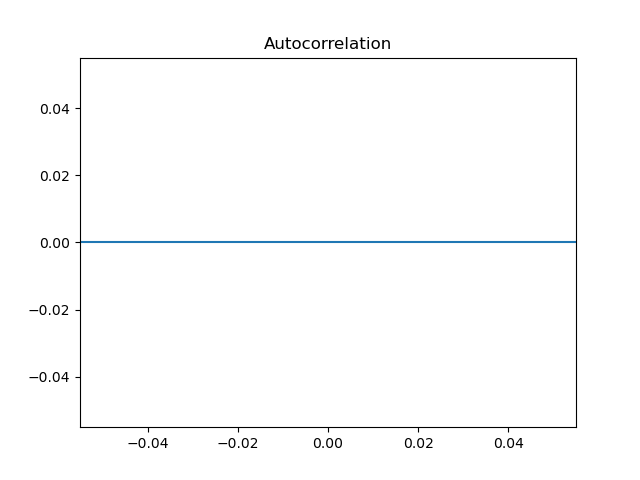

In [37]:
HH_diff = pit_HH.iloc[:,[1,4]]
HH_diff = HH_diff.set_index('GDAY_DS')
HH_diff = HH_diff.diff()
# plot_pacf(pit_HH.iloc[:,[4]])
HH_diff.plot()
plot_acf(HH_diff)

<IPython.core.display.Javascript object>


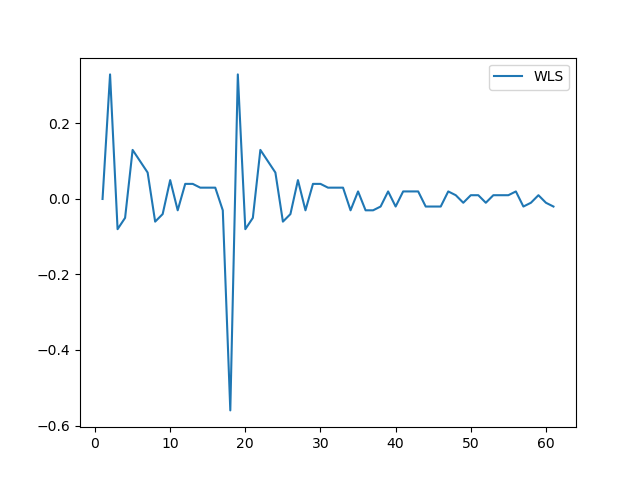

<IPython.core.display.Javascript object>


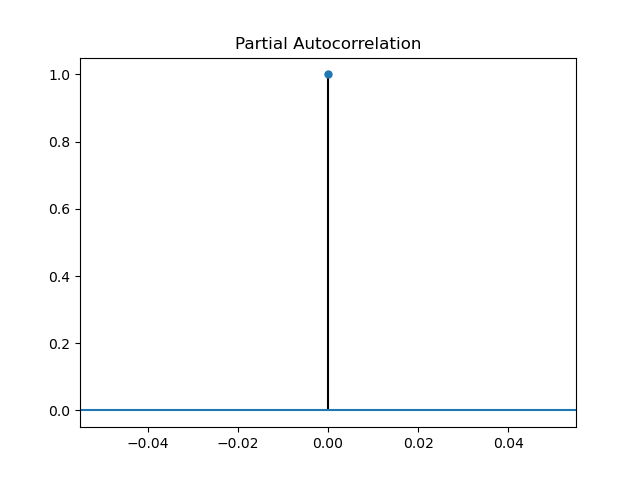

<IPython.core.display.Javascript object>


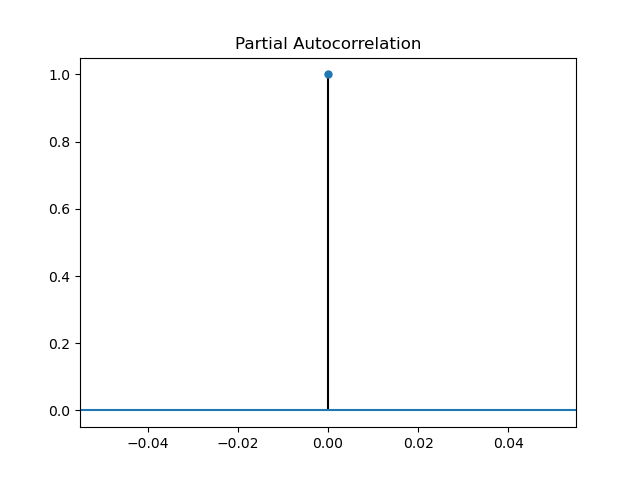

In [20]:
HT_dif = pit_HT.iloc[:,[4]].diff(1)
HT_dif.plot()
plot_pacf(HT_dif)

<IPython.core.display.Javascript object>


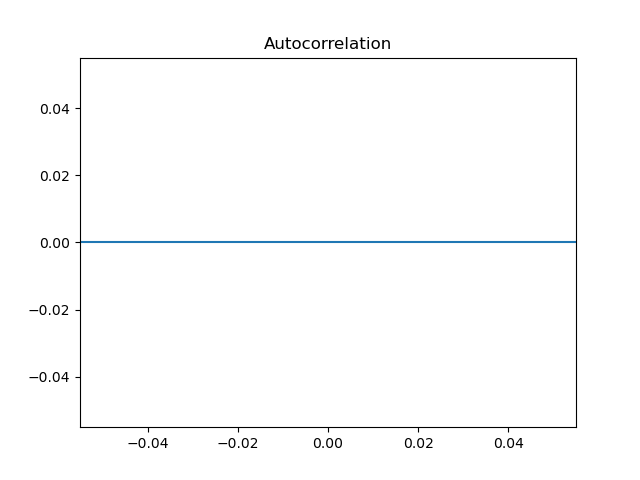

<IPython.core.display.Javascript object>


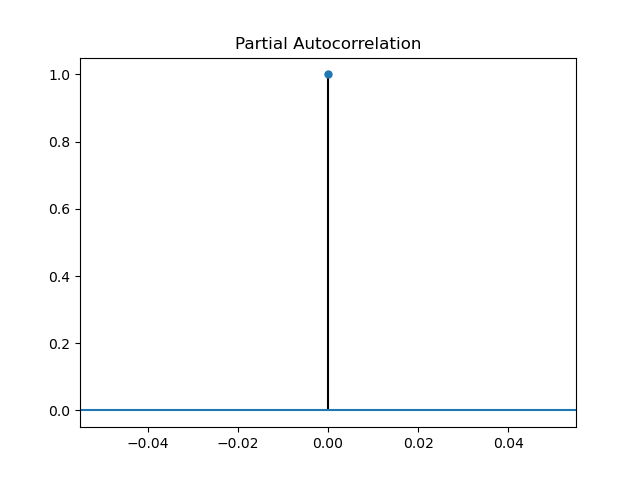

<IPython.core.display.Javascript object>


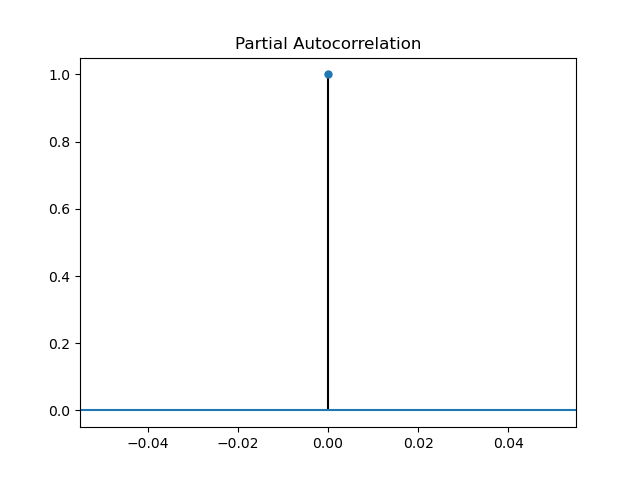

In [26]:
KT_dif = pit_KT.iloc[:,[4]].diff()
# KT_dif.plot()
plot_acf(KT_dif)
plot_pacf(KT_dif)

<IPython.core.display.Javascript object>


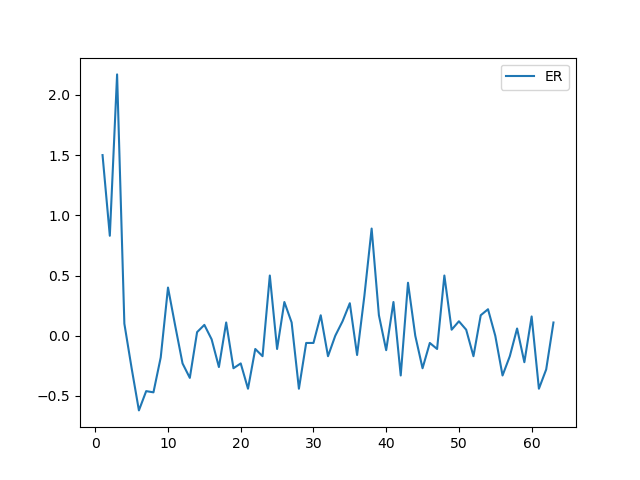

In [85]:
LG_dif = pit_LG.iloc[:,[4]].diff(1)
LG_dif.plot()

<IPython.core.display.Javascript object>


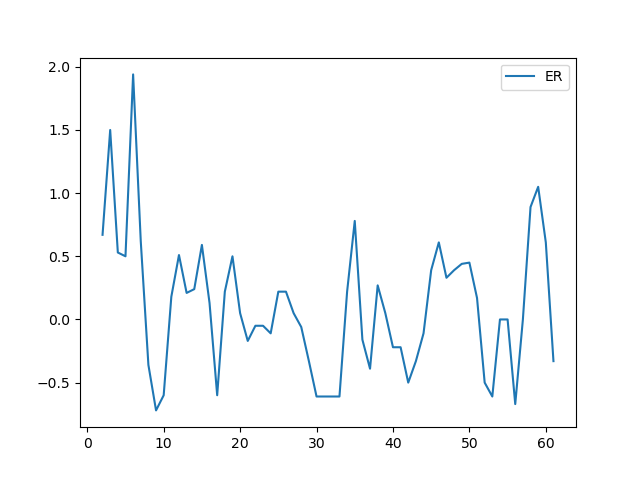

In [87]:
LT_dif = pit_LT.iloc[:,[4]].diff(2)
LT_dif.plot()

<IPython.core.display.Javascript object>


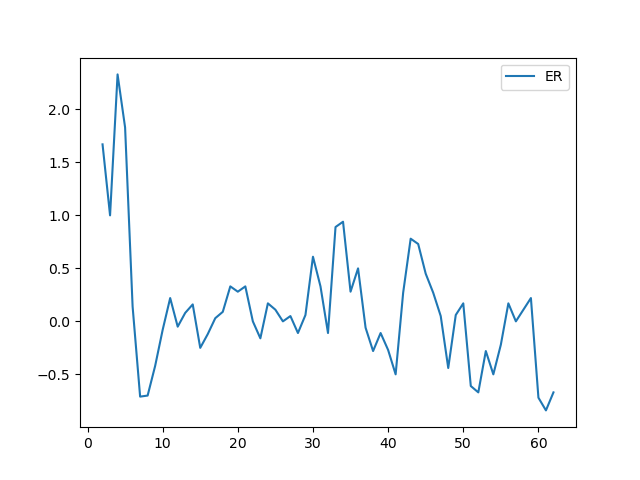

In [91]:
NC_dif = pit_NC.iloc[:,[4]].diff(2)
NC_dif.plot()

<IPython.core.display.Javascript object>


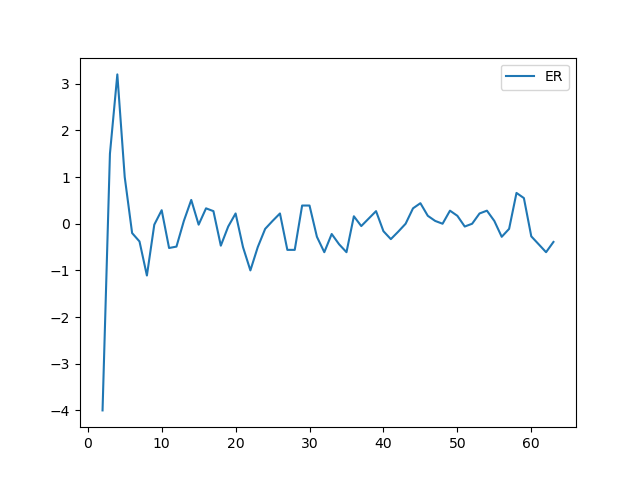

In [90]:
OB_dif = pit_OB.iloc[:,[4]].diff(2)
OB_dif.plot()

<IPython.core.display.Javascript object>


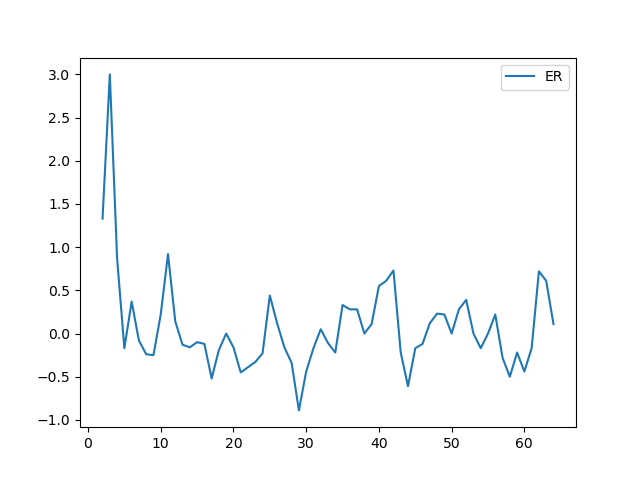

In [97]:
SK_dif = pit_SK.iloc[:,[4]].diff(2)
SK_dif.plot()

<IPython.core.display.Javascript object>


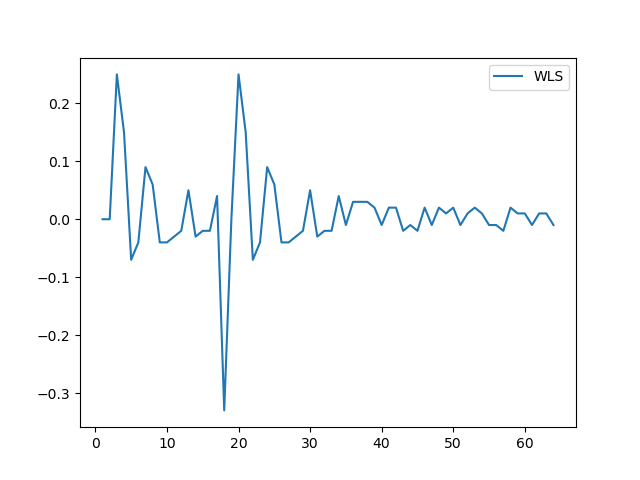

In [39]:
SS_dif = pit_SS.iloc[:,[4]].diff(1)
SS_dif.plot()
# plot_acf(SS_dif)

<IPython.core.display.Javascript object>


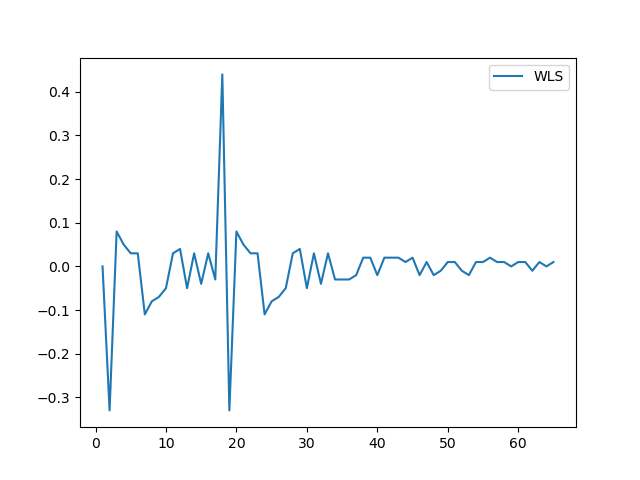

In [40]:
WO_dif = pit_WO.iloc[:,[4]].diff(1)
WO_dif.plot()

In [11]:
#한화 자책
import statsmodels.api as sm

hhER_model = ARIMA(HH_er, order=(1,2,1))
hhER_model_fit = hhER_model.fit(trend='c', full_output=True, disp=True)
print(hhER_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D2.ER   No. Observations:                   63
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 119.750
Method:                       css-mle   S.D. of innovations              0.036
Date:                Mon, 21 Sep 2020   AIC                           -231.500
Time:                        01:44:17   BIC                           -222.928
Sample:                             2   HQIC                          -228.129
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0281      0.028     -0.987      0.324      -0.084       0.028
ar.L1.D2.ER     0.9437      0.068     13.840      0.000       0.810       1.077
ma.L1.D2.ER    -0.6235      0.127     -4.920    

In [43]:
# 지역변수 전역변수
# pit_KT = pd.read_csv('./pit/pit_KT.csv')
# pit_LG = pd.read_csv('./pit/pit_LG.csv')
# pit_LT = pd.read_csv('./pit/pit_LT.csv')
# pit_NC = pd.read_csv('./pit/pit_NC.csv')
# pit_OB = pd.read_csv('./pit/pit_OB.csv')
# pit_SK = pd.read_csv('./pit/pit_SK.csv')
# pit_SS = pd.read_csv('./pit/pit_SS.csv')
# pit_WO = pd.read_csv('./pit/pit_WO.csv')
# tn = ['KT','LG','LT','NC','OB','SK','SS','WO']
# i=0
# for i in range(len(tn)):
#     z = 'pit'+'_'+tn[i]
#     z=z.drop([z.columns[1]],axis=1)    

SyntaxError: invalid syntax (<ipython-input-43-1f410f17e70e>, line 12)

In [29]:
# i=0 
# tn = ['KT','LG','LT','NC','OB','SK','SS','WO']
# z = 'pit'+'_'+tn[i]
# print(z)

pit_KT
